## Data-driven method to describe clustering result

- Sometimes, we are interested in describing characteristic of each cluster when we perform clustering analysis.
- However, it is not easy to characterize each cluster by comparing distribution of each variable among clusters.
- Here I introduce a simple data-driven method to describe clustering result.

## 1. Load data

In [1]:
import pandas as pd
from sklearn import datasets
iris_data = datasets.load_iris()
X = pd.DataFrame(iris_data['data'], columns=iris_data.feature_names)

In [2]:
X.shape

(150, 4)

In [3]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

## 2. Perform Clustering

In [4]:
def get_cluster_labels(X, n_clusters):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters)
    cluster_labels = kmeans.fit_predict(X)
    return cluster_labels

In [5]:
cluster_labels = get_cluster_labels(X, n_clusters=3) # The number of cluster is arbitrary.

## 3. Learn decision tree discriminating clusters

In [6]:
def get_tree_discriminating_clusters(X, cluster_labels):
    from sklearn.tree import DecisionTreeClassifier
    n_clusters = len(set(cluster_labels))
    dt = DecisionTreeClassifier(max_leaf_nodes=n_clusters, class_weight='balanced')
    dt.fit(X, cluster_labels)
    return dt

In [7]:
dt = get_tree_discriminating_clusters(X, cluster_labels)

#### Why decision tree?
- Easy to explain due to its orthogonal decision boundary
- Each path to leaf node can be a description of corresponding cluster

#### Explanation for decision tree classifier arguments
#### 1. max_leaf_nodes = n_clusters
- This leads to make simple and clear description for each cluster.
- max_leaf_nodes > n_clusters is possible, but this makes it hard to interpret descriptions as tree grows wide and deep.

#### 2. class_weight = 'balanced'
- When (max_leaf_nodes = n_clusters), cluster with small size can be ignored by tree(i.e. Maximizing accuracy by predicting majority cluster).
- Setting class weight to be balanced prevents such phenomena.

## 4. Visualize learned tree & Get description for each cluster

In [8]:
def get_tree_image_binary(dt, feature_names):
    from sklearn.tree import export_graphviz
    from sklearn.externals.six import StringIO
    import pydotplus as pydot
    dotfile = StringIO()
    export_graphviz(dt, out_file=dotfile, feature_names=feature_names,
                    proportion=True, filled=True, rounded=True, precision=2, impurity=False)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    dt_image_binary = graph.create_png()
    return dt_image_binary

In [9]:
dt_image_binary = get_tree_image_binary(dt, X.columns)

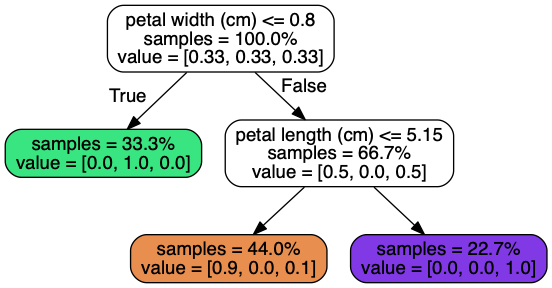

In [10]:
from IPython.display import Image
Image(dt_image_binary)

#### Finally, descriptions for clusters are as below.

#### **Cluster 1**: **[petal width (cm) <= 0.8]**

#### **Cluster 2**: **[petal width (cm) > 0.8]** **(AND)** **[petal length (cm) <= 5.15]**

#### **Cluster 3**: **[petal width (cm) > 0.8]** **(AND)** **[petal length (cm) > 5.15]**